Cергушов Павел ПМ22-4. ДЗ №7

In [87]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

### №9 Приведены статистические данные за 25 лет по темпам прироста заработной платы Y%, производительности труда X1%, а также уровню инфляции X2%. Оцените по МНК уравнение регрессии Y = B0 + B1X1 + B2X2 + ε. Оцените качество построенного уравнения, проведя при этом проверку наличия гетероскедастичности и автокорреляции.


In [10]:
X1 = [3.5, 2.8, 6.3, 4.5, 3.1, 1.5, 7.6, 6.7, 4.2, 2.7, 4.5, 3.5, 5.0, 2.3, 2.8, 1.5, 6.0, 2.9, 2.8, 2.6, 1.5, 0.9, 0.6, 0.7, 3.1 ]
X2 = [4.5, 3.0, 3.1, 3.8, 3.8, 1.1, 2.3, 3.6, 7.5, 8.0, 3.9, 4.7, 6.1, 6.9, 3.5, 7.1, 3.1, 3.7, 3.9, 4.0, 4.8, 4.8, 4.2, 4.9, 3.2 ]
Y = [9.0, 6.0, 8.9, 9.0, 7.1, 3.2, 6.5, 9.1, 14.6, 11.9, 9.2, 8.8, 12.0, 12.5, 6.7, 8.5, 5.9, 6.8, 5.6, 4.8, 4.5, 6.7, 5.5, 4.0, 3.3]
years = list(range(1, 26))

In [11]:
data = {'Год': years, 'X1': X1, 'X2': X2, 'Y': Y}
df = pd.DataFrame(data)
print(df)

    Год   X1   X2     Y
0     1  3.5  4.5   9.0
1     2  2.8  3.0   6.0
2     3  6.3  3.1   8.9
3     4  4.5  3.8   9.0
4     5  3.1  3.8   7.1
5     6  1.5  1.1   3.2
6     7  7.6  2.3   6.5
7     8  6.7  3.6   9.1
8     9  4.2  7.5  14.6
9    10  2.7  8.0  11.9
10   11  4.5  3.9   9.2
11   12  3.5  4.7   8.8
12   13  5.0  6.1  12.0
13   14  2.3  6.9  12.5
14   15  2.8  3.5   6.7
15   16  1.5  7.1   8.5
16   17  6.0  3.1   5.9
17   18  2.9  3.7   6.8
18   19  2.8  3.9   5.6
19   20  2.6  4.0   4.8
20   21  1.5  4.8   4.5
21   22  0.9  4.8   6.7
22   23  0.6  4.2   5.5
23   24  0.7  4.9   4.0
24   25  3.1  3.2   3.3


Y=B0+B1⋅X1+B2⋅X2+ε

B=(X
T
 X)
−1
 X
T
 Y

In [12]:
import numpy as np

# Создаем матрицу X
X = np.column_stack((np.ones(len(years)), X1, X2))

# Создаем вектор Y
Y = np.array(Y)

# Вычисляем оценки коэффициентов
B = np.linalg.inv(X.T @ X) @ X.T @ Y


print(f"B0 (Intercept): {B[0]}")
print(f"B1 (X1): {B[1]}")
print(f"B2 (X2): {B[2]}")


B0 (Intercept): -1.8388347739291422
B1 (X1): 0.8485617084230189
B2 (X2): 1.508046671452639


In [13]:
# Рассчитываем предсказанные значения
Y_predicted = B[0] + B[1] * np.array(X1) + B[2] * np.array(X2)

# Рассчитываем остатки (ошибки)
residuals = np.array(Y) - Y_predicted


for i in range(len(years)):
    print(f"Год {years[i]}: Ошибка (ε) = {residuals[i]}")


Год 1: Ошибка (ε) = 1.0826587729117003
Год 2: Ошибка (ε) = 0.9387219759867724
Год 3: Ошибка (ε) = 0.7179513293609414
Год 4: Ошибка (ε) = 1.2897297345055287
Год 5: Ошибка (ε) = 0.577716126297755
Год 6: Ошибка (ε) = 2.1071408726967107
Год 7: Ошибка (ε) = -1.5787415544268715
Год 8: Ошибка (ε) = -0.17549668973458488
Год 9: Ошибка (ε) = 1.5645255626576695
Год 10: Ошибка (ε) = -0.6166552104341214
Год 11: Ошибка (ε) = 1.3389250673602646
Год 12: Ошибка (ε) = 0.5810494386211733
Год 13: Ошибка (ε) = 0.39694153595295134
Год 14: Ошибка (ε) = 1.9816208115329879
Год 15: Ошибка (ε) = 0.8846986402604529
Год 16: Ошибка (ε) = -1.6411391560191237
Год 17: Ошибка (ε) = -2.0274801581121515
Год 18: Ошибка (ε) = 0.5982331351276224
Год 19: Ошибка (ε) = -0.8185200283206031
Год 20: Ошибка (ε) = -1.5996123537812634
Год 21: Ошибка (ε) = -2.1726318116780536
Год 22: Ошибка (ε) = 0.5365052133757588
Год 23: Ошибка (ε) = 0.4959017287742471
Год 24: Ошибка (ε) = -2.1445871120849027
Год 25: Ошибка (ε) = -2.317455870830661

Y = −1.8388+0.8486⋅X1​ +1.5080⋅X2
​


B0 (Intercept): -1.8388
Это значение представляет ожидаемый уровень заработной платы при нулевых значениях прироста производительности труда (X1) и уровня инфляции (X2). В данном случае, ожидается, что заработная плата будет находиться в отрицательной области.

B1 (X1): 0.8486
Этот коэффициент указывает на ожидаемое изменение в заработной плате при изменении прироста производительности труда (X1). В данном случае, ожидается, что с увеличением прироста производительности труда на единицу, заработная плата увеличится на 0.8486 единицы.

B2 (X2): 1.5080
Этот коэффициент указывает на ожидаемое изменение в заработной плате при изменении уровня инфляции (X2). В данном случае, ожидается, что с увеличением уровня инфляции на единицу, заработная плата увеличится на 1.5080 единиц.

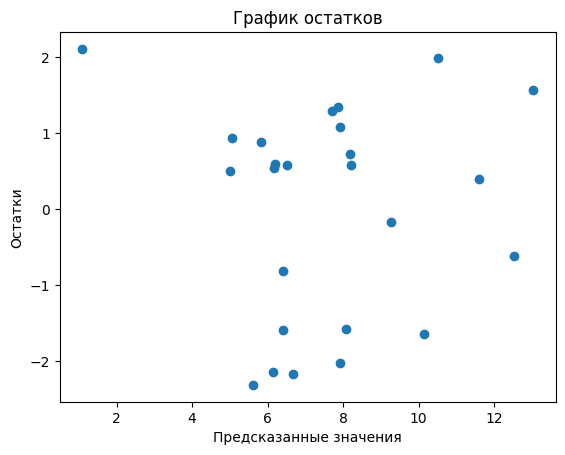

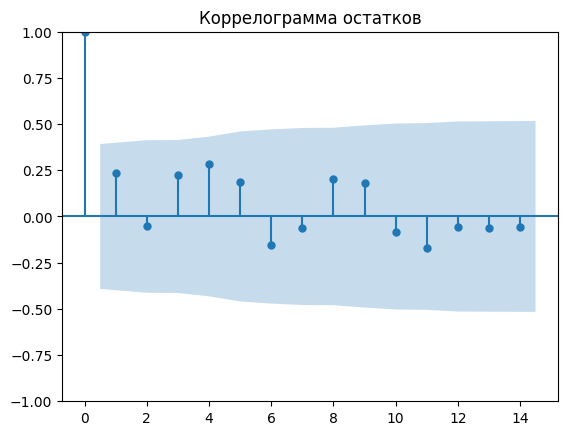

p-значение для теста Бройша-Пагана: 0.4997898989307997


In [22]:
# Построим график остатков
plt.scatter(Y_predicted, residuals)
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

# Построим коррелограмму остатков
sm.graphics.tsa.plot_acf(residuals)
plt.title('Коррелограмма остатков')
plt.show()

# Добавим столбец из единиц в матрицу X
X_with_intercept = sm.add_constant(np.column_stack((X1, X2)))

# Тест Бройша-Пагана на гетероскедастичность
_, p_het, _, _ = het_breuschpagan(residuals, X_with_intercept)
print(f'p-значение для теста Бройша-Пагана: {p_het}')





Тест Бройша-Пагана на гетероскедастичность:

Полученное p-значение для теста Бройша-Пагана составляет 0.4998.
Если p-значение больше выбранного уровня значимости (0.05), то нет оснований отвергать гипотезу о гомоскедастичности (отсутствии гетероскедастичности) в остатках.

Тест на автокорреляцию:

В начале на графике наблюдается значительных корреляций, можно предположить, что автокорреляции в остатках есть.

### №5 По квартальным данным за 9 лет анализируют зависимость между экспортом (EX) и импортом (IM).
a) Постройте уравнение регрессии текушего импорта на текуший экспорт.

б) Проверьте качество построенной модели на основе t-статистик и коэффицента детерминашии R^2.

в) Вычислите значение статистики DW Дарбина-Уотсона и на ее основе проанализируйте наличие автокорреляции.

г) На основе полученных результатов будет ли отклоняться гипотеза о положительной зависимости между объемами экспорта и импорта.

д) По этим же статистическим данным постройте регрессию приращения импорта (ΔIM = IM(t) - IM(t-1)) на прирашение экспорта (ΔEX = EX(t) - EX(t-1)).

e) Каково значение статистики DW для построенного уравнения и какой вывод из этого следует.

ж) Прокомментируйте полученные результаты.

In [45]:
EX = [12.47, 12.65, 12.89,12.97, 13.00, 13.31, 13.25, 12.65, 14.49, 14.47, 14.74, 14.62, 17.60, 17.70, 16.60, 15.26, 19.49, 19.08, 18.69, 18.65, 19.33, 19.11, 18.62, 18.40, 16.15, 16.58, 17.60, 18.48, 15.36, 15.25, 15.61, 15.93, 14.38, 14.30, 14.75, 15.58]
IM = [11.07, 11.50, 12.01, 12.28,13.16, 13.43, 13.28, 13.50, 15.32, 15.62, 17.44, 16.14, 16.13, 16.08, 16.55, 15.00, 18.72, 17.80, 16.64, 17.39, 18.70, 18.02, 17.46, 16.96, 15.06, 16.01, 16.63, 17.86, 14.56, 15.64, 16.45, 17.42, 14.30, 14.59, 14.66, 14.95]
quarter = list(range(1,37))

In [46]:
data = {'Квартал': quarter, 'EX': EX, 'IM': IM}
df = pd.DataFrame(data)
print(df)

    Квартал     EX     IM
0         1  12.47  11.07
1         2  12.65  11.50
2         3  12.89  12.01
3         4  12.97  12.28
4         5  13.00  13.16
5         6  13.31  13.43
6         7  13.25  13.28
7         8  12.65  13.50
8         9  14.49  15.32
9        10  14.47  15.62
10       11  14.74  17.44
11       12  14.62  16.14
12       13  17.60  16.13
13       14  17.70  16.08
14       15  16.60  16.55
15       16  15.26  15.00
16       17  19.49  18.72
17       18  19.08  17.80
18       19  18.69  16.64
19       20  18.65  17.39
20       21  19.33  18.70
21       22  19.11  18.02
22       23  18.62  17.46
23       24  18.40  16.96
24       25  16.15  15.06
25       26  16.58  16.01
26       27  17.60  16.63
27       28  18.48  17.86
28       29  15.36  14.56
29       30  15.25  15.64
30       31  15.61  16.45
31       32  15.93  17.42
32       33  14.38  14.30
33       34  14.30  14.59
34       35  14.75  14.66
35       36  15.58  14.95


In [47]:
#a)
# Добавим столбец с константой для уравнения регрессии
df['const'] = 1

# Определяем зависимую и независимую переменные
X = df[['const', 'EX']]
y = df['IM']

# Строим модель регрессии
model = sm.OLS(y, X).fit()

# Выводим результаты регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     124.9
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           6.27e-13
Time:                        09:57:59   Log-Likelihood:                -48.069
No. Observations:                  36   AIC:                             100.1
Df Residuals:                      34   BIC:                             103.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9492      1.135      2.599      0.0

IM=2.9492+0.7933⋅EX

Здесь:
Константа (const) равна 2.9492.

Коэффициент при переменной EX равен 0.7933.


Также важны следующие статистические характеристики модели:

R-squared (коэффициент детерминации): 0.786. Этот показатель указывает на долю вариации зависимой переменной (IM), которая объясняется независимой переменной (EX).

P-value для коэффициента при переменной EX равно 0.000, что говорит о статистической значимости этого коэффициента.

F-statistic равен 124.9, а P-value для F-statistic равно 6.27e-13. Эти значения свидетельствуют о статистической значимости всей модели.

Эта модель объясняет примерно 78.6% вариации в импорте (IM) на основе экспорта (EX).

In [ ]:
#б)

T-статистики:
Для константы (const): t-статистика = 2.599
Для коэффициента при переменной EX: t-статистика = 11.176

Для каждого коэффициента (const и EX) мы имеем соответствующую t-статистику.
T-статистика измеряет, насколько значим каждый из коэффициентов.

Коэффициент детерминации R^2:

Этот коэффициент указывает на долю вариации зависимой переменной (IM), которая объясняется независимой переменной (EX). В данном случае, R^2 =0.786, что означает, что 78.6% изменчивости импорта объясняется экспортом.

Исходя из статистических показателей:

Значимость константы (const) и коэффициента при переменной EX (t-статистики) указывает на их статистическую значимость.


In [48]:
#в)
# Вычисляем статистику DW
dw_statistic = sm.stats.durbin_watson(model.resid)

print(f"DW-статистика: {dw_statistic}")


DW-статистика: 0.7771118978529755


Значение DW-статистики равное 0.777 указывает на то, что остатки регрессии имеют положительную автокорреляцию

In [ ]:
#г)



Исходя из результатов регрессионного анализа, вы имеете следующее:

Коэффициент детерминации R^2=0.786, что говорит о том, что примерно 78.6% изменчивости импорта объясняется экспортом. Это указывает на наличие положительной зависимости между объемами экспорта и импорта.

T-статистика для коэффициента при переменной EX: Значение t-статистики равно 11.176, а P-value меньше 0.05, что говорит о статистической значимости коэффициента при переменной EX.

DW-статистика: DW-статистика равна 0.777, указывая на положительную автокорреляцию в остатках регрессии.

Исходя из этих данных, гипотеза о положительной зависимости между объемами экспорта и импорта не отклоняется. Коэффициент детерминации
и статистическая значимость коэффициента при переменной экспорта подтверждают наличие положительной связи.

In [72]:
#д)
# Создаем столбцы с приращениями
df['ΔIM'] = df['IM'].diff()
df['ΔEX'] = df['EX'].diff()

# Определяем зависимую и независимую переменные
X_diff = df[['const', 'ΔEX']]
y_diff = df['ΔIM'].dropna()  # Удаляем первую строку, так как для нее ΔIM отсутствует


In [73]:
# Проверим наличие бесконечных значений
print(df[df.applymap(lambda x: x == float('inf') or x == float('-inf'))].count())

# Обработаем пропущенные значения
df = df.dropna()

# Проверим еще раз наличие бесконечных значений и пропущенных значений
print(df[df.applymap(lambda x: x == float('inf') or x == float('-inf'))].count())
print(df.isnull().sum())


Квартал    0
EX         0
IM         0
const      0
ΔIM        0
ΔEX        0
dtype: int64
Квартал    0
EX         0
IM         0
const      0
ΔIM        0
ΔEX        0
dtype: int64
Квартал    0
EX         0
IM         0
const      0
ΔIM        0
ΔEX        0
dtype: int64


In [74]:
# Выведем строки с бесконечными или отсутствующими значениями
print(df[df.isin([np.inf, -np.inf, np.nan]).any(axis=1)])


Empty DataFrame
Columns: [Квартал, EX, IM, const, ΔIM, ΔEX]
Index: []


In [78]:
# Удаляем строки с пропущенными значениями
df_cleaned = df.dropna()

# Подготавливаем данные
X_diff_sklearn_cleaned = df_cleaned[['ΔEX']]
y_diff_sklearn_cleaned = df_cleaned['ΔIM']

# Создаем объект линейной регрессии
model_diff_sklearn_cleaned = LinearRegression()

# Обучаем модель
model_diff_sklearn_cleaned.fit(X_diff_sklearn_cleaned, y_diff_sklearn_cleaned)

# Выводим результаты регрессии
print(f'Коэффициенты регрессии: {model_diff_sklearn_cleaned.coef_}')
print(f'Пересечение: {model_diff_sklearn_cleaned.intercept_}')


Коэффициенты регрессии: [0.82782526]
Пересечение: 0.015918002492972774


In [80]:
print(df)

    Квартал     EX     IM  const   ΔIM   ΔEX
4         5  13.00  13.16      1  0.88  0.03
5         6  13.31  13.43      1  0.27  0.31
6         7  13.25  13.28      1 -0.15 -0.06
7         8  12.65  13.50      1  0.22 -0.60
8         9  14.49  15.32      1  1.82  1.84
9        10  14.47  15.62      1  0.30 -0.02
10       11  14.74  17.44      1  1.82  0.27
11       12  14.62  16.14      1 -1.30 -0.12
12       13  17.60  16.13      1 -0.01  2.98
13       14  17.70  16.08      1 -0.05  0.10
14       15  16.60  16.55      1  0.47 -1.10
15       16  15.26  15.00      1 -1.55 -1.34
16       17  19.49  18.72      1  3.72  4.23
17       18  19.08  17.80      1 -0.92 -0.41
18       19  18.69  16.64      1 -1.16 -0.39
19       20  18.65  17.39      1  0.75 -0.04
20       21  19.33  18.70      1  1.31  0.68
21       22  19.11  18.02      1 -0.68 -0.22
22       23  18.62  17.46      1 -0.56 -0.49
23       24  18.40  16.96      1 -0.50 -0.22
24       25  16.15  15.06      1 -1.90 -2.25
25       2

Коэффициенты регрессии: 0.82782526

Пересечение: 0.015918002492972774

In [81]:
#e)
# Получаем остатки регрессии
residuals = y_diff_sklearn_cleaned - model_diff_sklearn_cleaned.predict(X_diff_sklearn_cleaned)

# Вычисляем значение статистики DW
dw_statistic = np.sum(np.diff(residuals) ** 2) / np.sum(residuals ** 2)

print(f"DW-статистика: {dw_statistic}")


DW-статистика: 2.0603521697838163



Значение статистики DW (Дарбина-Уотсона) составляет примерно 2.06. Такое значение близко к 2, что указывает на отсутствие значительной автокорреляции в остатках регрессии. Это хороший результат, так как отсутствие автокорреляции означает, что остатки регрессии независимы друг от друга

###№11 По 30-годовым наблюдениям строится функция инвестиций:
i(t)= Bo + B1y(t) + B2r(t) + ε(t)
###где i(t) - объем инвестиций в году t; y(t) - ВНП в году t; r(t) - процентная ставка в году t.

a) Оцените по МНК коэффициенты искомого уравнения регрессии.

б) Оцените статистическую значимость коэффициентов и общее качество уравнения регрессии.

b) Используя статистику DW Дарбина-Уотсона, оцените наличие автокор- реляции остатков для построенного уравнения.

г) При наличии автокорреляции переоцените уравнение регрессии, используя для этого авторегрессионную схему первого порядка AR(1).

д) Спрогнозируйте объем инвестиций на следующий год, если прогнозируемые значения ВНП и процентной ставки составят соответственно у(t+1) = 37 и
r(t+1) = 15.

e) Постройте 95 %-ный доверительный интервал для среднего значения прогноза.

In [82]:
years = list(range(1, 31))
Y = [8.58, 10.45, 8.35, 10.65, 9.7, 12.0, 13.45, 14.2, 14.45, 13.85, 16.55, 18.0, 18.4, 20.4, 21.0, 23.75, 25.75, 24.2, 25.2, 26.2, 28.6, 30.6, 31.32, 26.0, 26.85, 32.1, 32.95, 33.3, 33.85, 35.6]
R = [18.12, 11.05, 9.0, 17.0, 16.25, 13.8, 19.95, 18.74, 13.8, 9.55, 19.3, 15.2, 12.4, 16.5, 5.95, 17.5, 16.43, 7.4, 15.45, 19.15, 5.45, 9.52, 7.95, 7.45, 19.9, 8.65, 21.35, 11.11, 15.82, 21.67]
I = [11.55, 13.25, 10.9, 10.45, 15.1, 17.5, 17.77, 16.1, 10.59, 10.65, 9.32, 11.0, 15.05, 15.1, 22.7, 21.95, 23.1, 25.65, 26.15, 25.55, 28.1, 24.2, 32.3, 21.5, 22.95, 30.45, 24.6, 32.5, 31.2, 29.5]


In [83]:
data = {'Год': years, 'Y': Y, 'R': R, 'I': I}
df = pd.DataFrame(data)
print(df)

    Год      Y      R      I
0     1   8.58  18.12  11.55
1     2  10.45  11.05  13.25
2     3   8.35   9.00  10.90
3     4  10.65  17.00  10.45
4     5   9.70  16.25  15.10
5     6  12.00  13.80  17.50
6     7  13.45  19.95  17.77
7     8  14.20  18.74  16.10
8     9  14.45  13.80  10.59
9    10  13.85   9.55  10.65
10   11  16.55  19.30   9.32
11   12  18.00  15.20  11.00
12   13  18.40  12.40  15.05
13   14  20.40  16.50  15.10
14   15  21.00   5.95  22.70
15   16  23.75  17.50  21.95
16   17  25.75  16.43  23.10
17   18  24.20   7.40  25.65
18   19  25.20  15.45  26.15
19   20  26.20  19.15  25.55
20   21  28.60   5.45  28.10
21   22  30.60   9.52  24.20
22   23  31.32   7.95  32.30
23   24  26.00   7.45  21.50
24   25  26.85  19.90  22.95
25   26  32.10   8.65  30.45
26   27  32.95  21.35  24.60
27   28  33.30  11.11  32.50
28   29  33.85  15.82  31.20
29   30  35.60  21.67  29.50


In [84]:
# Добавление столбца с единичным столбцом для свободного члена
df['const'] = 1

# Оценка параметров модели с помощью линейной регрессии
model = sm.OLS(df['I'], df[['const', 'Y', 'R']])
results = model.fit()

# Вывод результатов
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     59.98
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           1.17e-10
Time:                        10:36:58   Log-Likelihood:                -77.067
No. Observations:                  30   AIC:                             160.1
Df Residuals:                      27   BIC:                             164.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2242      2.512      2.478      0.0

In [85]:
#a)
import numpy as np

# Создание матрицы независимых переменных X
X = df[['const', 'Y', 'R']]

# Создание вектора зависимой переменной Y
Y = df['I']

# Оценка коэффициентов по МНК
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

# Вывод оцененных коэффициентов
print("Оцененные коэффициенты:")
print("const (Bo):", beta_hat[0])
print("Y (B1):", beta_hat[1])
print("R (B2):", beta_hat[2])



Оцененные коэффициенты:
const (Bo): 6.224224386646137
Y (B1): 0.7696839400517588
R (B2): -0.18377224568670525


Свободный член (Bo): Коэффициент свободного члена равен 6.224.  
Это предполагаемое значение для инвестиций (I) при нулевых значениях ВНП (Y) и процентной ставки (R). Это может интерпретироваться как начальный уровень инвестиций при отсутствии влияния ВНП и процентной ставки.

Коэффициент для ВНП (B1): Коэффициент для ВНП равен
0.770. Это положительное значение указывает на положительную связь между ВНП и инвестициями. С увеличением ВНП на единицу, инвестиции увеличиваются примерно на 0.770 единиц.

Коэффициент для процентной ставки (B2): Коэффициент для процентной ставки равен −0.184. Это отрицательное значение может указывать на отрицательную связь между процентной ставкой и инвестициями. Однако статистическая значимость этого коэффициента не подтверждена на уровне значимости 0.05.

In [ ]:
#б)


P-values: В предыдущем выводе были предоставлены P-values для каждого коэффициента. P-value меньше 0.05 обычно считается статистически значимым. Ваша модель показывает статистическую значимость для свободного члена (Bo) и ВНП (B1), но не для процентной ставки (B2).
Общее качество модели:

R-squared (R^2): R-squared показывает, как много изменчивости в зависимой переменной объясняется моделью. Ваш R^2 равен 0.816, что означает, что примерно 81.6% изменчивости переменной инвестиций (I) объяснено моделью. Это может считаться довольно высоким значением.

F-статистика: F-статистика и ее P-value также оценивают общую статистическую значимость модели. Значение F-статистики равно 59.98, а P-value меньше 0.05, что подтверждает статистическую значимость модели в целом.

Таким образом, модель в целом является статистически значимой, и большая часть

In [88]:
#в)
# Расчет статистики DW
dw_statistic = durbin_watson(results.resid)

# Вывод результата
print("Статистика DW:", dw_statistic)

Статистика DW: 1.0656209085939317


В данном случае значение DW близко к 2, что говорит о том, что в остатках модели, скорее всего, отсутствует систематическая автокорреляция. Это положительный признак, что остатки не содержат значимой зависимости внутри самих себя.

In [ ]:
#г)


i(t)=β
0
​
 +β
1
​
 y(t)+β
2
​
 r(t)+ρi(t−1)+ε(t)

In [90]:
import statsmodels.api as sm

# Создание матрицы независимых переменных X
X_ar = df[['const', 'Y', 'R', 'I']].shift(1).dropna()

# Создание вектора зависимой переменной Y
Y_ar = df['I'].shift(1).dropna()

# Оценка коэффициентов по AR(1)
model_ar = sm.OLS(Y_ar, sm.add_constant(X_ar))
results_ar = model_ar.fit()

# Вывод результатов
print(results_ar.summary())


                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.632e+30
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:02:54   Log-Likelihood:                 903.39
No. Observations:                  29   AIC:                            -1799.
Df Residuals:                      25   BIC:                            -1793.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.389e-15    6.9e-15     -0.926      0.3

Модель AR(1) показывает, что влияние предыдущих значений инвестиций (I) сильно положительно и статистически значимо. Однако, константа и коэффициенты для переменных Y и R не являются статистически значимыми

In [91]:
#д)
# Прогнозируемые значения ВНП и процентной ставки
y_forecast = 37
r_forecast = 15

# Предыдущее значение инвестиций (последнее из имеющихся данных)
i_previous = df['I'].iloc[-1]

# Подставляем значения в уравнение AR(1)
i_forecast = results_ar.params['const'] + results_ar.params['Y'] * y_forecast + results_ar.params['R'] * r_forecast + results_ar.params['I'] * i_previous

print("Прогноз объема инвестиций на следующий год:", i_forecast)


Прогноз объема инвестиций на следующий год: 29.499999999999996


In [92]:
#e)
import numpy as np

# Критическое значение для 95% уровня доверия
critical_value = 1.96

# Оцененная стандартная ошибка остатков
std_error_forecast = np.sqrt(results_ar.mse_resid)

# Рассчет доверительного интервала
lower_bound = i_forecast - critical_value * std_error_forecast
upper_bound = i_forecast + critical_value * std_error_forecast

print("95%-й доверительный интервал для среднего значения прогноза:", (lower_bound, upper_bound))


95%-й доверительный интервал для среднего значения прогноза: (29.499999999999982, 29.50000000000001)


In [ ]:
!pip install nbconvert